In [1]:
import requests
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#### Datos Suministrados por la Agencia Nacional de Hidrocarburos
Tomados desde el API en Formato .json

In [2]:
url = "https://www.datos.gov.co/resource/wpjb-8um2.json"
response = requests.get(url)
data_2018 = response.json()

In [3]:
url = "https://www.datos.gov.co/resource/vcuy-z8kj.json"
response = requests.get(url)
data_2019 = response.json()

In [4]:
url = "https://www.datos.gov.co/resource/6v67-9pip.json"
response = requests.get(url)
data_2020 = response.json()

In [5]:
url = "https://www.datos.gov.co/resource/i5aj-8t8t.json"
response = requests.get(url)
data_2021 = response.json()

In [6]:
datos_2018 = pd.DataFrame(data_2018)
datos_2019 = pd.DataFrame(data_2019)
datos_2020 = pd.DataFrame(data_2020)
datos_2021 = pd.DataFrame(data_2021)

#### Producción Fiscalizada de Petróleo del (2019 - 2021)

##### Limpieza de datos que son relevantes para el estudio

In [7]:
datos_2018 = datos_2018.drop(["latitud", "longitud", "geolocalizacion", "contrato"], axis = 1)
datos_2019 = datos_2019.drop(["latitud", "longitud", "geolocalizacion", "contrato"], axis = 1)
datos_2020 = datos_2020.drop(["latitud", "longitud", "geolocalizacion", "contrato"], axis = 1)
datos_2021 = datos_2021.drop(["latitud", "longitud", "geolocalizacion", "contrato"], axis = 1)

 En este caso se convirten los meses que estaban en formato texto a formato Float

In [8]:
datos_años = {
    "datos_2018": datos_2018,
    "datos_2019": datos_2019,
    "datos_2020": datos_2020,
    "datos_2021": datos_2021
}

meses = ["enero", "febrero", "marzo", "abril", "mayo", "junio", "julio", "agosto", "septiembre", "octubre", "noviembre", "diciembre"]

for datos in datos_años:
    datos_años[datos][meses] = datos_años[datos][meses].astype("float64")

Para este los Dataframes del los años 2018, 2019 y 2020 no tienen datos nulos

### Análisis AÑO 2018
#### Se realiza el calculo de la produccion de crudo de cada mes del año 2018

In [9]:
datos_2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 469 entries, 0 to 468
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   departamento  469 non-null    object 
 1   municipio     469 non-null    object 
 2   operadora     469 non-null    object 
 3   campo         469 non-null    object 
 4   enero         469 non-null    float64
 5   febrero       469 non-null    float64
 6   marzo         469 non-null    float64
 7   abril         469 non-null    float64
 8   mayo          469 non-null    float64
 9   junio         469 non-null    float64
 10  julio         469 non-null    float64
 11  agosto        469 non-null    float64
 12  septiembre    469 non-null    float64
 13  octubre       469 non-null    float64
 14  noviembre     469 non-null    float64
 15  diciembre     469 non-null    float64
dtypes: float64(12), object(4)
memory usage: 58.8+ KB


In [10]:
produccion_mes_2018 = datos_2018.groupby("departamento").agg({
    "enero": "sum",
    "febrero": "sum",
    "marzo": "sum",
    "abril": "sum",
    "mayo": "sum",
    "junio": "sum",
    "julio": "sum",
    "agosto": "sum",
    "septiembre": "sum",
    "octubre": "sum",
    "noviembre": "sum",
    "diciembre": "sum" 
})

#### Grafico de los 5 departamentos con mayor produccion de crudo en 2018

Text(0, 0.5, '(BPD)')

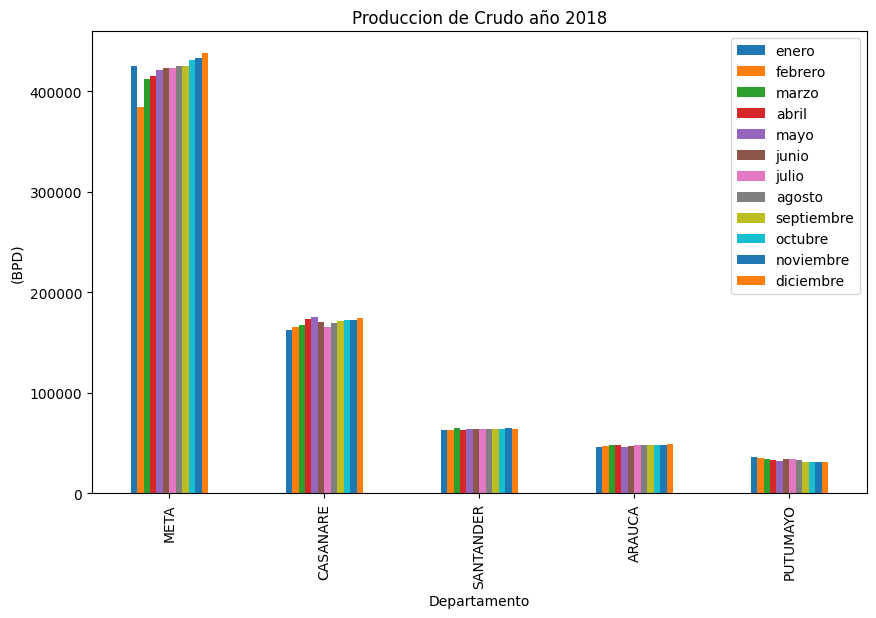

In [11]:
produccion_cinco_dep_2018 = produccion_mes_2018.sort_values(by = "enero", ascending = False).head(5)

produccion_cinco_dep_2018.plot(kind = "bar", figsize=(10, 6))

plt.title("Produccion de Crudo año 2018", loc = "center")
plt.xlabel("Departamento")
plt.ylabel("(BPD)")

#### Grafico produccion total de crudo año 2018 por departamento

In [12]:
produccion_año_2018 = produccion_mes_2018.sort_values(by = "enero", ascending = False).reset_index()

In [13]:
produccion_año_2018["produccion año 2018"] = produccion_año_2018[meses].mean(axis = 1)

Text(0, 0.5, '(BPD)')

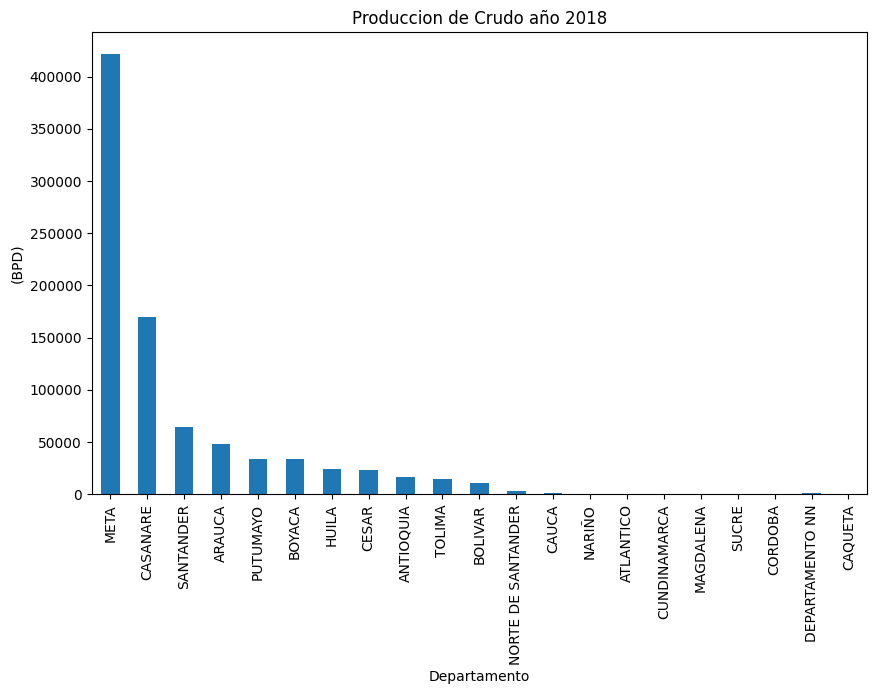

In [14]:
barras_2018 = produccion_mes_2018.sort_values(by = "enero", ascending = False)
barras_2018["produccion año 2018"] = barras_2018[meses].mean(axis = 1)
barras_2018["produccion año 2018"].plot(kind = "bar", figsize=(10, 6))

plt.title("Produccion de Crudo año 2018", loc = "center")
plt.xlabel("Departamento")
plt.ylabel("(BPD)")

In [15]:
produccion_año_2018_total = produccion_año_2018["produccion año 2018"].sum().round(0)
produccion_año_2018_total

np.float64(865192.0)

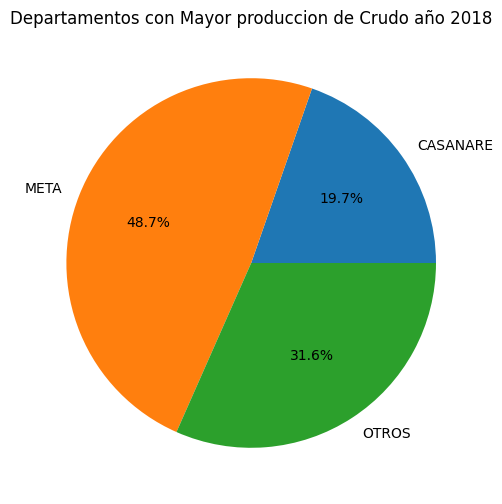

In [16]:
pastel_2018 = produccion_año_2018[["departamento", "produccion año 2018"]]

departamentos = ["SANTANDER", "ARAUCA", "PUTUMAYO",
                  "BOYACA", "HUILA", "CESAR", "ANTIOQUIA",
                  "TOLIMA", "BOLIVAR", "NORTE DE SANTANDER", 
                  "CAUCA", "NARIÑO", "ATLANTICO",
                  "CUNDINAMARCA", "MAGDALENA", "SUCRE", 
                  "CORDOBA", "DEPARTAMENTO NN", "CAQUETA"]

pastel_2018.loc[pastel_2018["departamento"].isin(departamentos), "departamento"] = "OTROS"

pastel_2018 = pastel_2018.groupby("departamento").sum().reset_index()

plt.figure(figsize=(6, 6))
plt.pie(pastel_2018["produccion año 2018"], labels = pastel_2018["departamento"], autopct='%1.1f%%')
plt.title("Departamentos con Mayor produccion de Crudo año 2018")
plt.show()

##### Departamentos con mayor actividad productora del pais en 2018

In [17]:
datos_2018["departamento"].value_counts().head(10)

departamento
CASANARE     176
META          80
SANTANDER     34
HUILA         28
ARAUCA        26
PUTUMAYO      26
CESAR         24
TOLIMA        19
BOYACA        13
ANTIOQUIA      8
Name: count, dtype: int64

In [18]:
produccion_año_2018[["departamento", "produccion año 2018"]].loc[5:6].round(0)

,departamento,produccion año 2018
5,BOYACA,34033.0
6,HUILA,24128.0


##### 5 operadoras con mayor actividad en la produccion de crudo en el año 2018

In [19]:
datos_2018["operadora"].value_counts().head(5)

operadora
ECOPETROL S.A.                                     116
Frontera Energy Colombia Corp Sucursal Colombia     67
PERENCO COLOMBIA LIMITED                            36
HOCOL S.A.                                          29
OCCIDENTAL DE COLOMBIA LLC                          23
Name: count, dtype: int64

### Análisis AÑO 2019
#### Se realiza el calculo de la produccion de crudo de cada mes del año 2019

In [20]:
produccion_mes_2019 = datos_2019.groupby("departamento").agg({
    "enero": "sum",
    "febrero": "sum",
    "marzo": "sum",
    "abril": "sum",
    "mayo": "sum",
    "junio": "sum",
    "julio": "sum",
    "agosto": "sum",
    "septiembre": "sum",
    "octubre": "sum",
    "noviembre": "sum",
    "diciembre": "sum" 
})

#### Grafico de los 5 departamentos con mayor produccion de crudo en 2019

Text(0, 0.5, '(BPD)')

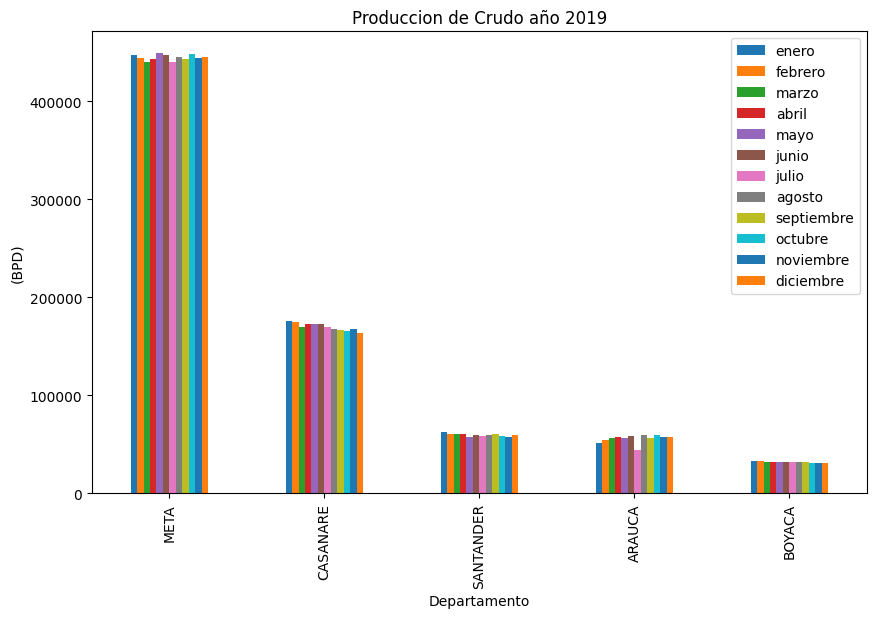

In [21]:
produccion_cinco_dep_2019 = produccion_mes_2019.sort_values(by = "enero", ascending = False).head(5)

produccion_cinco_dep_2019.plot(kind = "bar", figsize=(10, 6))

plt.title("Produccion de Crudo año 2019", loc = "center")
plt.xlabel("Departamento")
plt.ylabel("(BPD)")

#### Grafico produccion total de crudo año 2019 por departamento

In [22]:
produccion_año_2019 = produccion_mes_2019.sort_values(by = "enero", ascending = False).reset_index()

In [23]:
produccion_año_2019["produccion año 2019"] = produccion_año_2019[meses].mean(axis = 1)

Text(0, 0.5, '(BPD)')

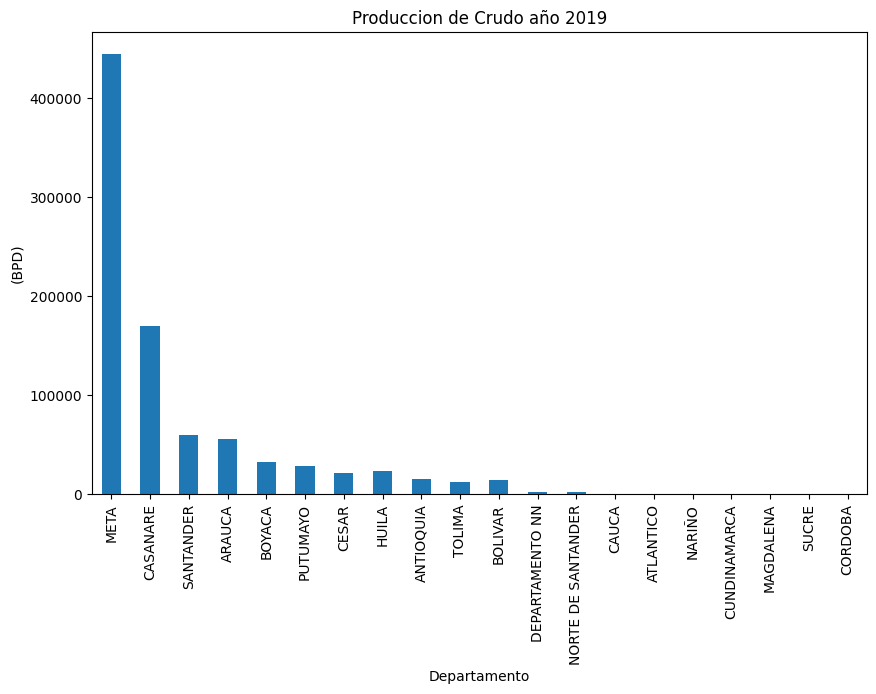

In [24]:
barras_2019 = produccion_mes_2019.sort_values(by = "enero", ascending = False)
barras_2019["produccion año 2019"] = barras_2019[meses].mean(axis = 1)
barras_2019["produccion año 2019"].plot(kind = "bar", figsize=(10, 6))

plt.title("Produccion de Crudo año 2019", loc = "center")
plt.xlabel("Departamento")
plt.ylabel("(BPD)")

In [25]:
produccion_año_2019_total = produccion_año_2019["produccion año 2019"].sum().round(0)
produccion_año_2019_total

np.float64(885884.0)

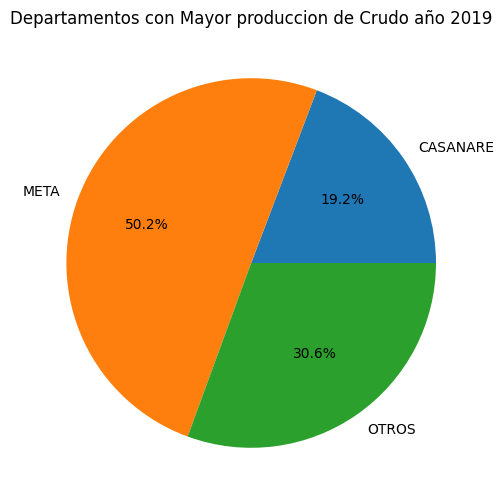

In [26]:
pastel_2019 = produccion_año_2019[["departamento", "produccion año 2019"]]

departamentos = ["SANTANDER", "ARAUCA", "PUTUMAYO",
                  "BOYACA", "HUILA", "CESAR", "ANTIOQUIA",
                  "TOLIMA", "BOLIVAR", "NORTE DE SANTANDER", 
                  "CAUCA", "NARIÑO", "ATLANTICO",
                  "CUNDINAMARCA", "MAGDALENA", "SUCRE", 
                  "CORDOBA", "DEPARTAMENTO NN", "CAQUETA"]

pastel_2019.loc[pastel_2019["departamento"].isin(departamentos), "departamento"] = "OTROS"

pastel_2019 = pastel_2019.groupby("departamento").sum().reset_index()

plt.figure(figsize=(6, 6))
plt.pie(pastel_2019["produccion año 2019"], labels = pastel_2019["departamento"], autopct='%1.1f%%')
plt.title("Departamentos con Mayor produccion de Crudo año 2019")
plt.show()

##### Departamentos con mayor actividad productora del pais en 2019

In [27]:
datos_2019["departamento"].value_counts().head(10)

departamento
CASANARE     177
META          77
SANTANDER     32
HUILA         28
PUTUMAYO      27
ARAUCA        27
CESAR         22
TOLIMA        20
BOYACA        13
ANTIOQUIA      7
Name: count, dtype: int64

In [28]:
produccion_año_2019[["departamento", "produccion año 2019"]].loc[0:1].round(0)

,departamento,produccion año 2019
0,META,444680.0
1,CASANARE,170272.0


##### 5 operadoras con mayor actividad en la produccion de crudo en el año 2019

In [29]:
datos_2019["operadora"].value_counts().head(5)

operadora
ECOPETROL S.A.                                     103
Frontera Energy Colombia Corp Sucursal Colombia     67
PERENCO COLOMBIA LIMITED                            34
HOCOL S.A.                                          27
OCCIDENTAL DE COLOMBIA LLC                          24
Name: count, dtype: int64

### Análisis AÑO 2020
#### Se realiza el calculo de la produccion de crudo de cada mes del año 2020

In [30]:
produccion_mes_2020 = datos_2020.groupby("departamento").agg({
    "enero": "sum",
    "febrero": "sum",
    "marzo": "sum",
    "abril": "sum",
    "mayo": "sum",
    "junio": "sum",
    "julio": "sum",
    "agosto": "sum",
    "septiembre": "sum",
    "octubre": "sum",
    "noviembre": "sum",
    "diciembre": "sum" 
})

#### Grafico de los 5 departamentos con mayor produccion de crudo en 2020

Text(0, 0.5, '(BPD)')

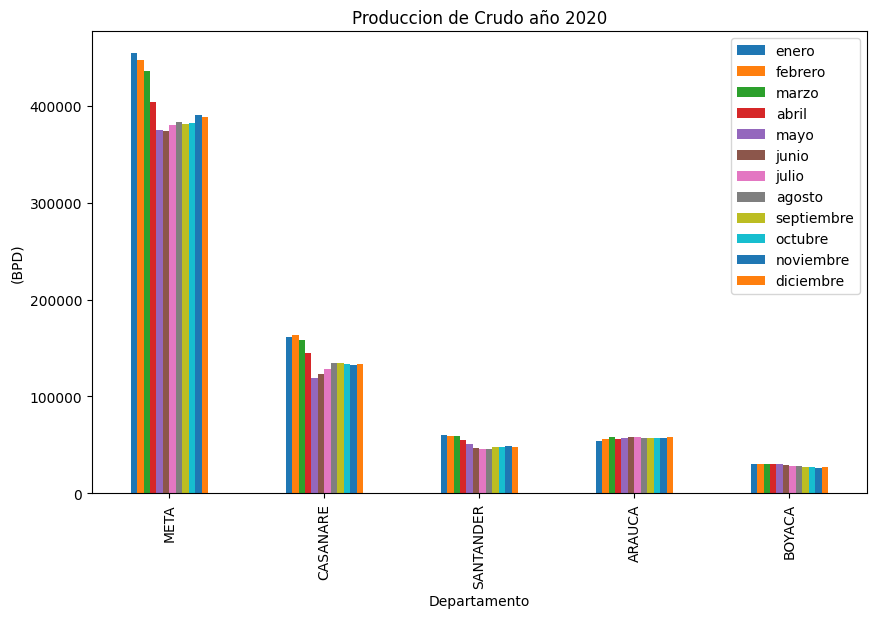

In [31]:
produccion_cinco_dep_2020 = produccion_mes_2020.sort_values(by = "enero", ascending = False).head(5)

produccion_cinco_dep_2020.plot(kind = "bar", figsize=(10, 6))

plt.title("Produccion de Crudo año 2020", loc = "center")
plt.xlabel("Departamento")
plt.ylabel("(BPD)")

#### Grafico produccion total de crudo año 2020 por departamento

In [32]:
produccion_año_2020 = produccion_mes_2020.sort_values(by = "enero", ascending = False).reset_index()

In [33]:
produccion_año_2020["produccion año 2020"] = produccion_año_2020[meses].mean(axis = 1)

Text(0, 0.5, '(BPD)')

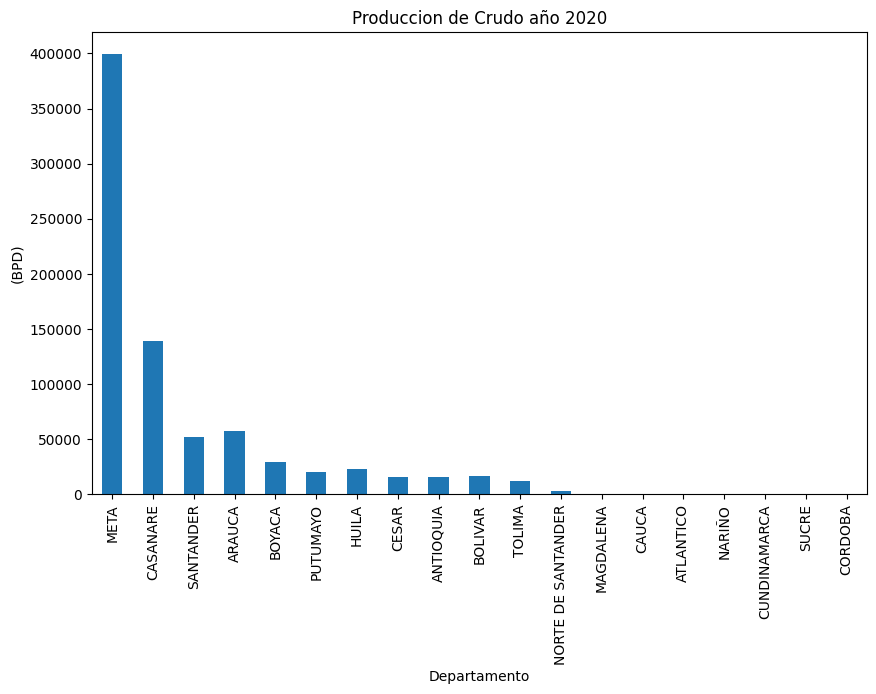

In [34]:
barras_2020 = produccion_mes_2020.sort_values(by = "enero", ascending = False)
barras_2020["produccion año 2020"] = barras_2020[meses].mean(axis = 1)
barras_2020["produccion año 2020"].plot(kind = "bar", figsize=(10, 6))

plt.title("Produccion de Crudo año 2020", loc = "center")
plt.xlabel("Departamento")
plt.ylabel("(BPD)")

In [35]:
produccion_año_2020_total = produccion_año_2020["produccion año 2020"].sum().round(0)
produccion_año_2020_total

np.float64(781369.0)

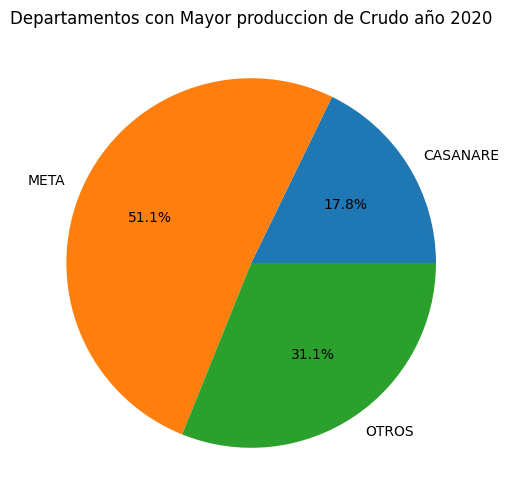

In [36]:
pastel_2020 = produccion_año_2020[["departamento", "produccion año 2020"]]

departamentos = ["SANTANDER", "ARAUCA", "PUTUMAYO",
                  "BOYACA", "HUILA", "CESAR", "ANTIOQUIA",
                  "TOLIMA", "BOLIVAR", "NORTE DE SANTANDER", 
                  "CAUCA", "NARIÑO", "ATLANTICO",
                  "CUNDINAMARCA", "MAGDALENA", "SUCRE", 
                  "CORDOBA", "DEPARTAMENTO NN", "CAQUETA"]

pastel_2020.loc[pastel_2020["departamento"].isin(departamentos), "departamento"] = "OTROS"

pastel_2020 = pastel_2020.groupby("departamento").sum().reset_index()

plt.figure(figsize=(6, 6))
plt.pie(pastel_2020["produccion año 2020"], labels = pastel_2020["departamento"], autopct='%1.1f%%')
plt.title("Departamentos con Mayor produccion de Crudo año 2020")
plt.show()

##### Departamentos con mayor actividad productora del pais en 2020

In [37]:
datos_2020["departamento"].value_counts().head(10)

departamento
CASANARE     169
META          77
SANTANDER     35
HUILA         28
PUTUMAYO      27
ARAUCA        24
TOLIMA        24
CESAR         14
BOYACA        12
ANTIOQUIA      7
Name: count, dtype: int64

In [38]:
produccion_año_2020[["departamento", "produccion año 2020"]].loc[0:1].round(2)

,departamento,produccion año 2020
0,META,399402.31
1,CASANARE,139047.03


##### 5 operadoras con mayor actividad en la produccion de crudo en el año 2020

In [39]:
datos_2020["operadora"].value_counts().head(5)

operadora
ECOPETROL S.A.                                     105
Frontera Energy Colombia Corp Sucursal Colombia     66
PERENCO COLOMBIA LIMITED                            35
HOCOL S.A.                                          32
GRAN TIERRA ENERGY COLOMBIA LTD                     22
Name: count, dtype: int64

### Análisis AÑO 2021
#### Se realiza el calculo de la produccion de crudo de cada mes del año 2021

In [40]:
produccion_mes_2021 = datos_2021.groupby("departamento").agg({
    "enero": "sum",
    "febrero": "sum",
    "marzo": "sum",
    "abril": "sum",
    "mayo": "sum",
    "junio": "sum",
    "julio": "sum",
    "agosto": "sum",
    "septiembre": "sum",
    "octubre": "sum",
    "noviembre": "sum",
    "diciembre": "sum" 
})

In [41]:
datos_2021.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 405 entries, 0 to 404
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   departamento  405 non-null    object 
 1   municipio     405 non-null    object 
 2   operadora     405 non-null    object 
 3   campo         405 non-null    object 
 4   enero         404 non-null    float64
 5   febrero       404 non-null    float64
 6   marzo         404 non-null    float64
 7   abril         404 non-null    float64
 8   mayo          404 non-null    float64
 9   junio         404 non-null    float64
 10  julio         404 non-null    float64
 11  agosto        404 non-null    float64
 12  septiembre    402 non-null    float64
 13  octubre       402 non-null    float64
 14  noviembre     402 non-null    float64
 15  diciembre     402 non-null    float64
dtypes: float64(12), object(4)
memory usage: 50.8+ KB


##### En este caso hay datos Nulos, y estos se remplazan por 0

In [42]:
datos_2021 = datos_2021.fillna(0)

In [43]:
datos_2021.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 405 entries, 0 to 404
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   departamento  405 non-null    object 
 1   municipio     405 non-null    object 
 2   operadora     405 non-null    object 
 3   campo         405 non-null    object 
 4   enero         405 non-null    float64
 5   febrero       405 non-null    float64
 6   marzo         405 non-null    float64
 7   abril         405 non-null    float64
 8   mayo          405 non-null    float64
 9   junio         405 non-null    float64
 10  julio         405 non-null    float64
 11  agosto        405 non-null    float64
 12  septiembre    405 non-null    float64
 13  octubre       405 non-null    float64
 14  noviembre     405 non-null    float64
 15  diciembre     405 non-null    float64
dtypes: float64(12), object(4)
memory usage: 50.8+ KB


#### Grafico de los 5 departamentos con mayor produccion de crudo en 2021

Text(0, 0.5, '(BPD)')

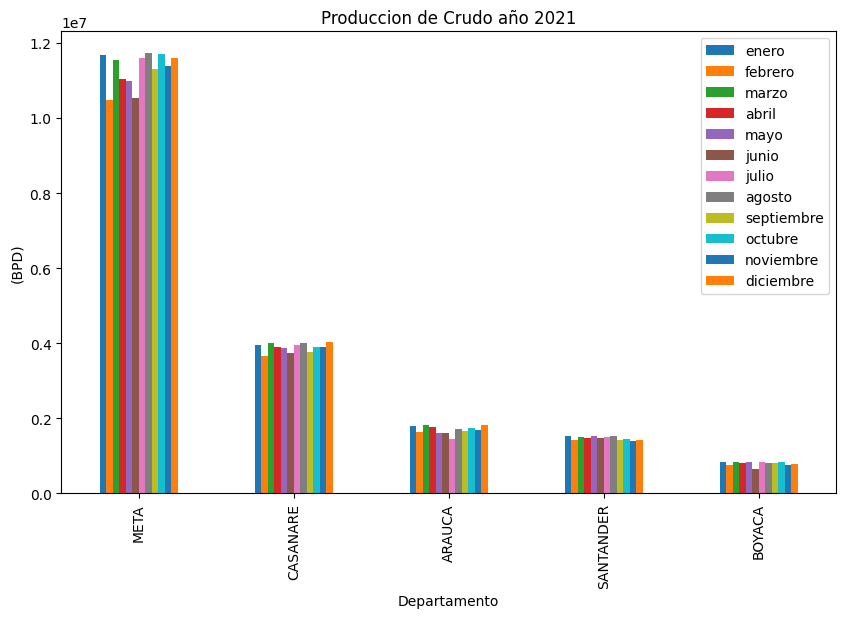

In [44]:
produccion_cinco_dep_2021 = produccion_mes_2021.sort_values(by = "enero", ascending = False).head(5)

produccion_cinco_dep_2021.plot(kind = "bar", figsize=(10, 6))

plt.title("Produccion de Crudo año 2021", loc = "center")
plt.xlabel("Departamento")
plt.ylabel("(BPD)")

#### Grafico produccion total de crudo año 2021 por departamento

In [45]:
produccion_año_2021 = produccion_mes_2021.sort_values(by = "enero", ascending = False).reset_index()

In [46]:
produccion_año_2021["produccion año 2021"] = produccion_año_2021[meses].mean(axis = 1)

Text(0, 0.5, '(BPD)')

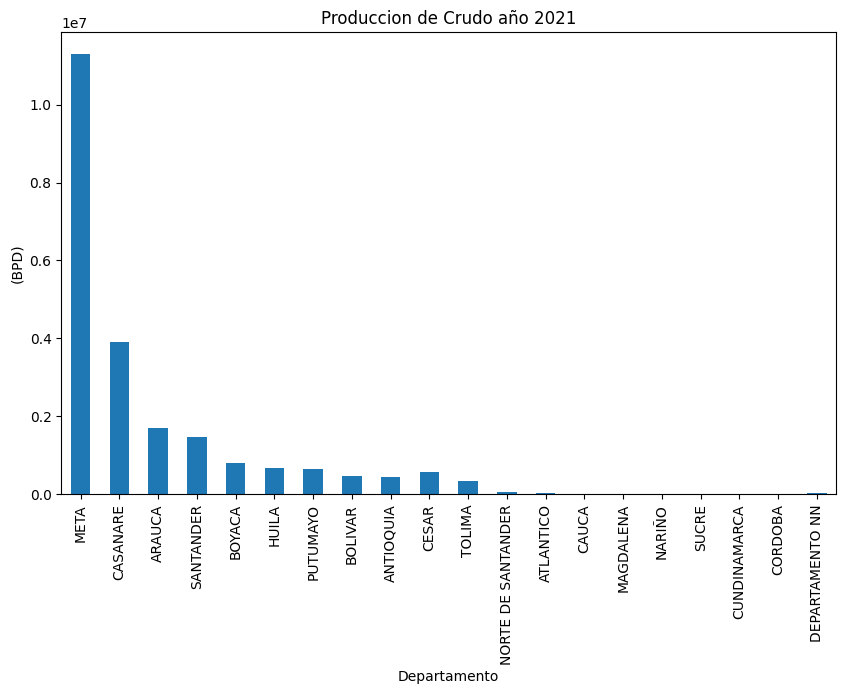

In [47]:
barras_2021 = produccion_mes_2021.sort_values(by = "enero", ascending = False)
barras_2021["produccion año 2021"] = barras_2021[meses].mean(axis = 1)
barras_2021["produccion año 2021"].plot(kind = "bar", figsize=(10, 6))

plt.title("Produccion de Crudo año 2021", loc = "center")
plt.xlabel("Departamento")
plt.ylabel("(BPD)")

In [48]:
produccion_año_2021_total = produccion_año_2021["produccion año 2021"].sum().round(0)
produccion_año_2021_total

np.float64(22397685.0)

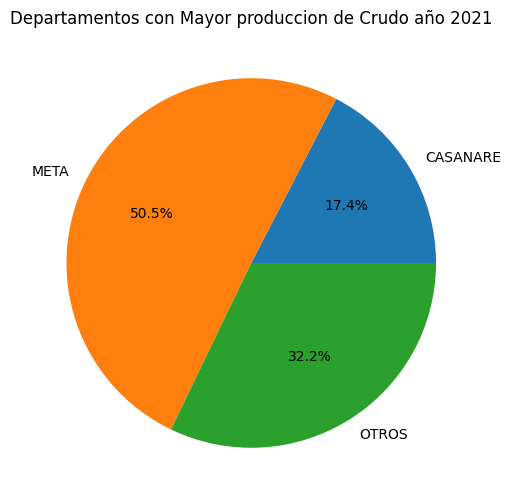

In [49]:
pastel_2021 = produccion_año_2021[["departamento", "produccion año 2021"]]

departamentos = ["SANTANDER", "ARAUCA", "PUTUMAYO",
                  "BOYACA", "HUILA", "CESAR", "ANTIOQUIA",
                  "TOLIMA", "BOLIVAR", "NORTE DE SANTANDER", 
                  "CAUCA", "NARIÑO", "ATLANTICO",
                  "CUNDINAMARCA", "MAGDALENA", "SUCRE", 
                  "CORDOBA", "DEPARTAMENTO NN", "CAQUETA"]

pastel_2021.loc[pastel_2021["departamento"].isin(departamentos), "departamento"] = "OTROS"

pastel_2021 = pastel_2021.groupby("departamento").sum().reset_index()

plt.figure(figsize=(6, 6))
plt.pie(pastel_2021["produccion año 2021"], labels = pastel_2021["departamento"], autopct='%1.1f%%')
plt.title("Departamentos con Mayor produccion de Crudo año 2021")
plt.show()

##### Departamentos con mayor actividad productora del pais en 2021

In [50]:
datos_2021["departamento"].value_counts().head(10)

departamento
CASANARE     150
META          63
PUTUMAYO      38
HUILA         27
SANTANDER     24
ARAUCA        24
TOLIMA        22
CESAR         15
BOYACA        12
ANTIOQUIA      7
Name: count, dtype: int64

In [51]:
produccion_año_2021[["departamento", "produccion año 2021"]].loc[0:1].round(2)

,departamento,produccion año 2021
0,META,11299676.88
1,CASANARE,3897078.75


##### 5 operadoras con mayor actividad en la produccion de crudo en el año 2020

In [52]:
datos_2021["operadora"].value_counts().head(5)

operadora
ECOPETROL S.A.                                     117
Frontera Energy Colombia Corp Sucursal Colombia     44
PERENCO COLOMBIA LIMITED                            33
HOCOL S.A.                                          30
SIERRACOL ENERGY ARAUCA LLC                         22
Name: count, dtype: int64

#### Al analizar los datos del año 2021, se puede notar que estos datos son erroneos debio a los valores de produccion de (BPD) en cada departamento, acontinuacion se muestra la lista de produccion de crudo para el mes de enero en los departamentos. y se puede ver que para el caso del meta se produjo 11.691.209 (BPD). siendo un dato inconsistente en comparacion a los años anteriores. por tal motivo los datos del año 2021 no se van a tener encuenta para el siguiente analisis. 

In [53]:
d = datos_2021.groupby("departamento")["enero"].sum()
d = d.sort_values(ascending = False)
d

departamento
META                  11691209.18
CASANARE               3968469.12
ARAUCA                 1797591.19
SANTANDER              1535801.19
BOYACA                  848503.21
HUILA                   682869.68
PUTUMAYO                680889.90
BOLIVAR                 503322.34
ANTIOQUIA               466663.34
CESAR                   461853.29
TOLIMA                  362062.59
NORTE DE SANTANDER       74920.90
ATLANTICO                16547.34
CAUCA                    13383.95
MAGDALENA                 1779.28
NARIÑO                    1106.64
SUCRE                      879.42
CUNDINAMARCA               654.89
CORDOBA                     25.88
DEPARTAMENTO NN              0.00
Name: enero, dtype: float64

## Produccion Total de crudo entre los años 2018 a 2020

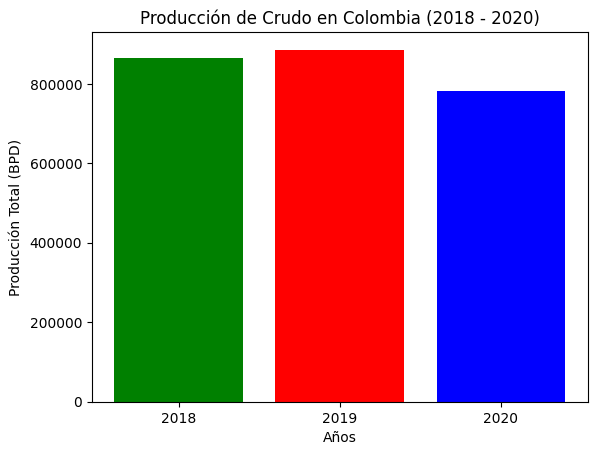

In [54]:
x = ["2018", "2019", "2020"]
y = [produccion_año_2018_total, produccion_año_2019_total, produccion_año_2020_total]

plt.bar(x, height = y, color = ["green", "red", "blue"])

plt.title("Producción de Crudo en Colombia (2018 - 2020)", loc="center")
plt.xlabel("Años")
plt.ylabel("Producción Total (BPD)")

plt.show()

##### Al añadir la produccion total del año 2021 se ve la inconsistencia en los datos de este año

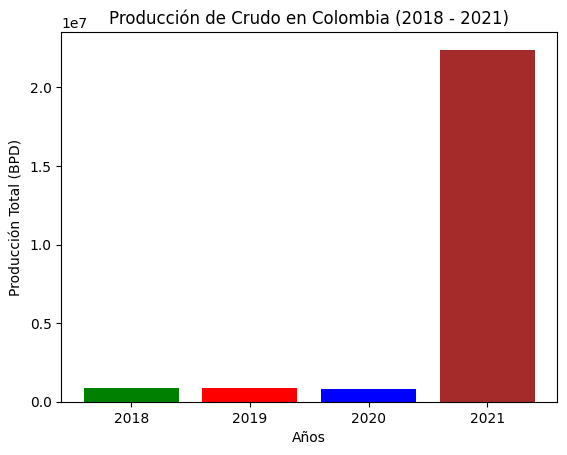

In [56]:
x = ["2018", "2019", "2020", "2021"]
y = [produccion_año_2018_total, produccion_año_2019_total, produccion_año_2020_total, produccion_año_2021_total]

plt.bar(x, height = y, color = ["green", "red", "blue", "brown"])

plt.title("Producción de Crudo en Colombia (2018 - 2021)", loc="center")
plt.xlabel("Años")
plt.ylabel("Producción Total (BPD)")

plt.show()